In [49]:
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics

In [70]:
payoffs = {
    'A': [100, -150],
    'B': [100, -150],
    'C': [50, 0],
    'D': [50, 0]
}

def game(strategy):
    count = 0
    snapshots = [] #array of tuples (count, balance, selection, payoff)    
    balance = 2000
    while count < 1000:
        if strategy == 'random':
            selection = ['A', 'B', 'C', 'D'][np.random.randint(4)]
        if strategy == 'risk-loving':
            selection = ['A', 'B'][np.random.randint(2)]
        if strategy == 'risk-averse':
            selection = ['C', 'D'][np.random.randint(2)]
        payoff = payoffs[selection][np.random.randint(2)]
        snapshots.append((count, balance, selection, payoff))
        balance += payoff
        count += 1
        
    counts = [snapshot[0] for snapshot in snapshots]
    balances = [snapshot[1] for snapshot in snapshots]
    selections = [snapshot[2] for snapshot in snapshots]
    observed_payoffs = [snapshot[3] for snapshot in snapshots]
    
    plt.plot(counts, balances)
    
    return balance
            
        

In [71]:
def analyze_strategy(n, strategy):
    balances = []

    for i in range(n):
        result = game(strategy)
        balances.append(result)

    print('Min: {}'.format(min(balances)))
    print('Mean: {}'.format(statistics.mean(balances)))
    print('Median: {}'.format(statistics.median(balances)))
    print('Standard Dev: {}'.format(statistics.stdev(balances)))
    print('Max: {}'.format(max(balances)))

Min: -3500
Mean: 1932
Median: 1675.0
Standard Dev: 2695.2963143636402
Max: 9500


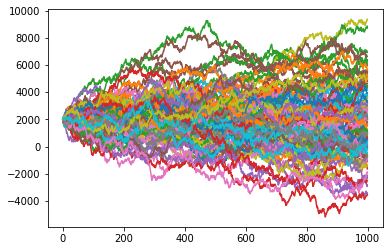

In [72]:
analyze_strategy(100, 'random')

Min: -38500
Mean: -23207.5
Median: -23000.0
Standard Dev: 4031.763875711839
Max: -12250


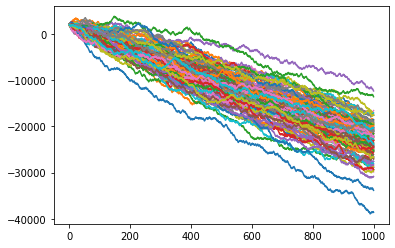

In [73]:
analyze_strategy(100, 'risk-loving')

Min: 25050
Mean: 26936.5
Median: 26950.0
Standard Dev: 791.0756964891272
Max: 29100


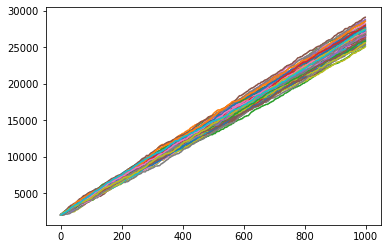

In [74]:
analyze_strategy(100, 'risk-averse')